You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/platforms-and-tools/blob/main/Python_Crash_course_2020/7-Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 



## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Time series with statsmodel

statsmodels.tsa contains model classes and functions that are useful for time series analysis. https://www.statsmodels.org/stable/tsa.html

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
import warnings
warnings.filterwarnings('ignore')

## Data transformation

In [116]:
airpass = pd.read_csv("airline_passengers.csv")
airpass.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [117]:
airpass['Month']= pd.to_datetime(airpass['Month'])
airpass.set_index('Month', inplace=True)
airpass

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


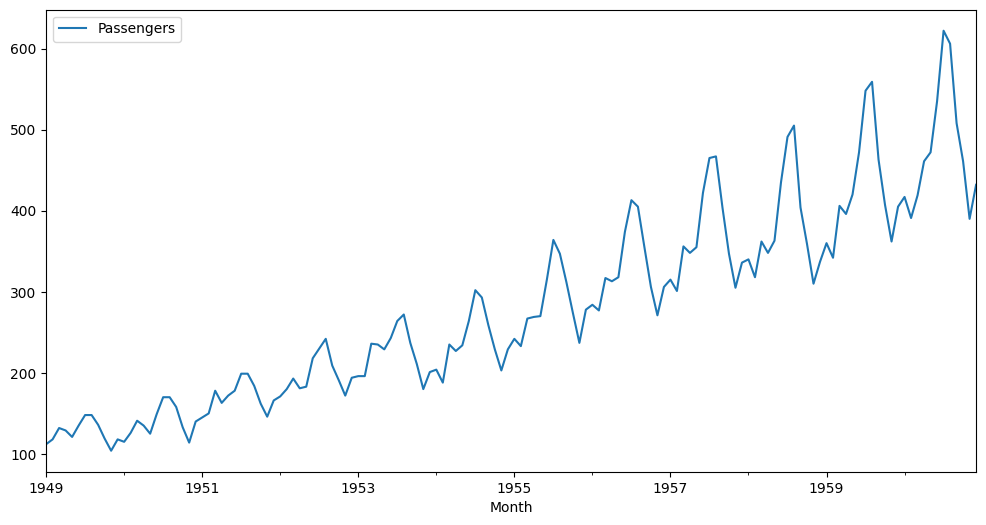

In [118]:
airpass.plot(figsize=(12,6))
plt.show()

In [119]:
# Log transformation 
airpass['log_pass']= np.log(airpass.Passengers)

# power transformation, say p=0.5
airpass['sqrt_pass']= np.sqrt(airpass.Passengers)

airpass.head()

,Passengers,log_pass,sqrt_pass
Month,,,
1949-01-01,112,4.718499,10.583005
1949-02-01,118,4.770685,10.862780
1949-03-01,132,4.882802,11.489125
1949-04-01,129,4.859812,11.357817
1949-05-01,121,4.795791,11.000000


In [120]:
# Box-Cox 
from scipy.stats import boxcox


In [121]:
airpass['boxcox_pass'] , lambd = boxcox(airpass.Passengers)
airpass

,Passengers,log_pass,sqrt_pass,boxcox_pass
Month,,,,
1949-01-01,112,4.718499,10.583005,6.827490
1949-02-01,118,4.770685,10.862780,6.932822
1949-03-01,132,4.882802,11.489125,7.161892
1949-04-01,129,4.859812,11.357817,7.114611
1949-05-01,121,4.795791,11.000000,6.983787
...,...,...,...,...
1960-08-01,606,6.406880,24.617067,10.684049
1960-09-01,508,6.230481,22.538855,10.234573
1960-10-01,461,6.133398,21.470911,9.992159


In [122]:
lambd

0.14802265137037945

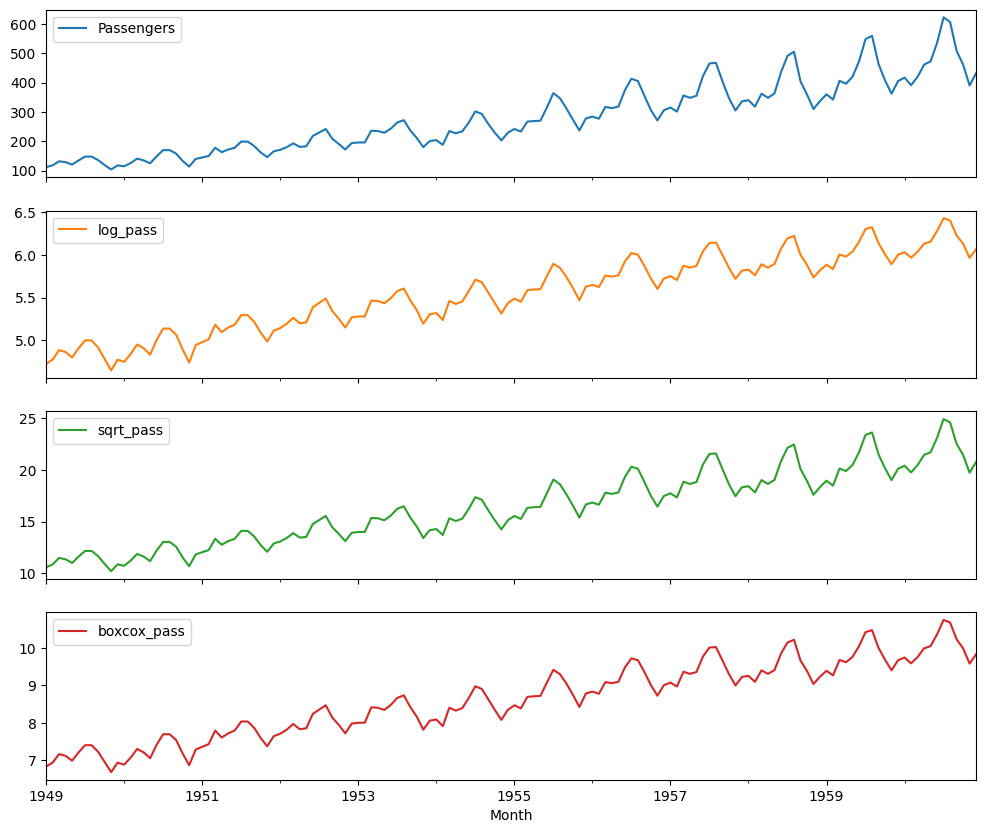

In [123]:
airpass.plot(subplots=True, figsize=(12,10))
plt.show()

## ACF and PACF

* ACF: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html
* PACF: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html

In [140]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

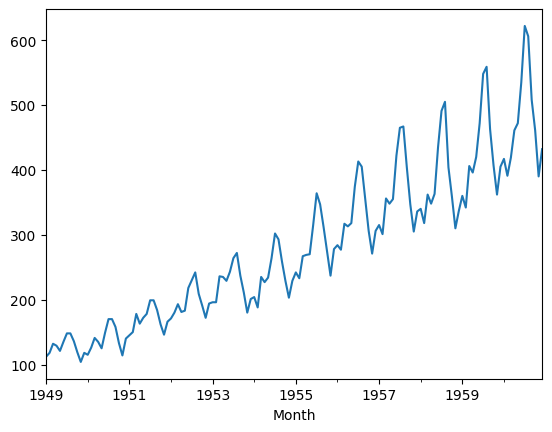

In [152]:
airpass.Passengers.plot()
plt.show()

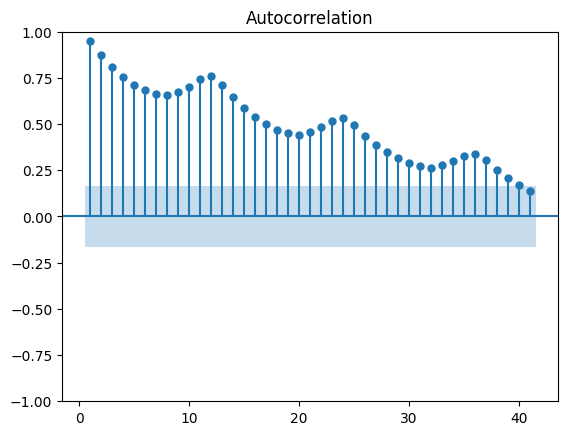

In [165]:
plot_acf(airpass.Passengers, lags = 41, zero=False, alpha=0.05, bartlett_confint=False)
plt.show()

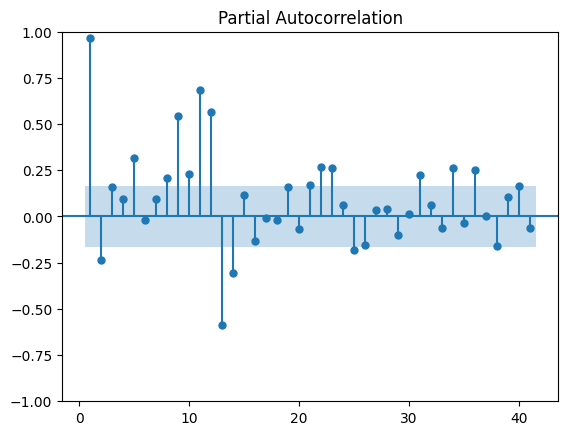

In [157]:
plot_pacf(airpass.boxcox_pass, lags = 41, zero = False,alpha=0.05, method='ols')
plt.show()

## Seasonal Decomposition: 

https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

In [129]:
from statsmodels.tsa.seasonal import seasonal_decompose

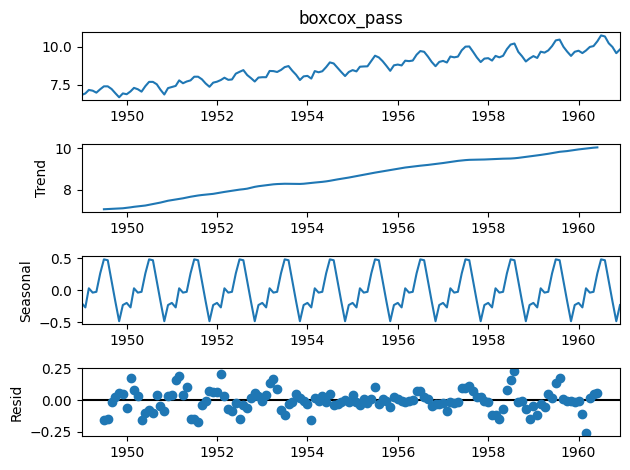

In [132]:
result = seasonal_decompose(airpass.boxcox_pass, model='additive')  
result.plot();
plt.show()

## White Noise: 


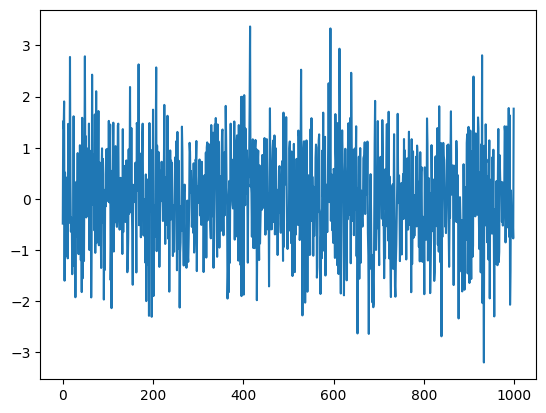

In [ ]:
wn = np.random.randn(1000)
plt.plot(wn)
plt.show()


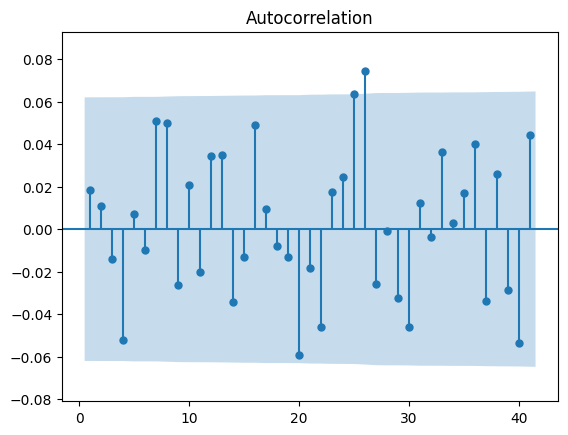

In [166]:
plot_acf(wn, lags = 41, zero=False, alpha=0.05 , auto_ylims=True)
plt.show()

## Random Walk: 


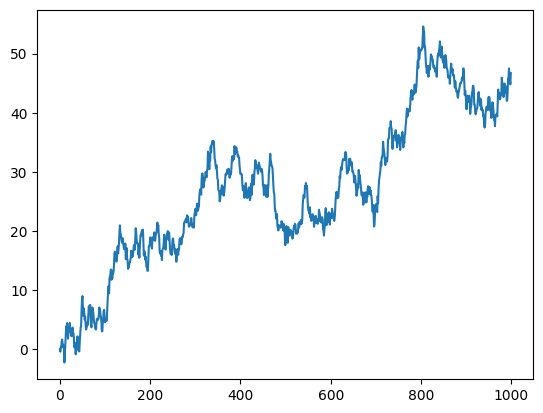

In [138]:
rw = np.zeros(1000)

for i in range(1,1000):
    rw[i] = rw[i-1]+ np.random.randn()
    
plt.plot(rw)
plt.show()

## Forecasting benchmarks

In [1]:
import yfinance as yf

In [4]:
aapl = yf.download('AAPL', start='2021-01-01',end='2023-01-23')[['Adj Close']]
aapl.head()


[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2021-01-04,127.874954
2021-01-05,129.455948
2021-01-06,125.098282
2021-01-07,129.367035
2021-01-08,130.483627


In [13]:
aapl['MA30']= aapl['Adj Close'].rolling(30).mean()
aapl

,Adj Close,MA30
Date,,
2021-01-04,127.874954,NaN
2021-01-05,129.455948,NaN
2021-01-06,125.098282,NaN
2021-01-07,129.367035,NaN
2021-01-08,130.483627,NaN
...,...,...
2023-01-13,134.759995,135.467333
2023-01-17,135.940002,135.055000
2023-01-18,135.210007,134.635000


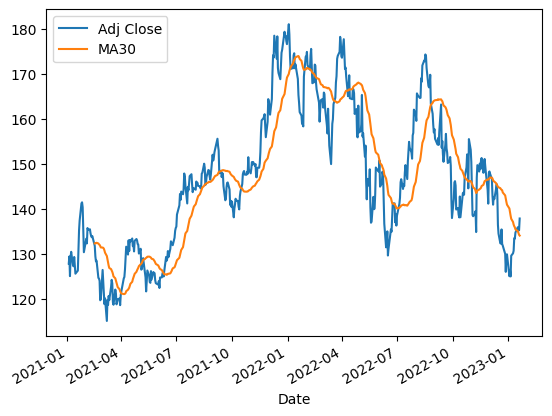

In [12]:
aapl.plot()
plt.show()

In [14]:
aapl.isna()

,Adj Close,MA30
Date,,
2021-01-04,False,True
2021-01-05,False,True
2021-01-06,False,True
2021-01-07,False,True
2021-01-08,False,True
...,...,...
2023-01-13,False,False
2023-01-17,False,False
2023-01-18,False,False


In [17]:
# Filling the NA's
aapl['MA30']= aapl['MA30'].fillna(method = 'bfill')
# ffill =  this is front filling meaning that using last price for missing value
# bfill =  this is back filling meaning that using next price for missing values

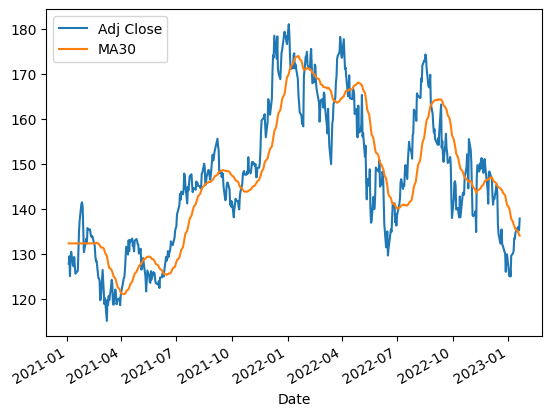

In [23]:
aapl.plot()
plt.show()

In [25]:
# let's split the data intor train and test
len(aapl)

516

In [27]:
train = aapl[0:456]
test = aapl[456:]

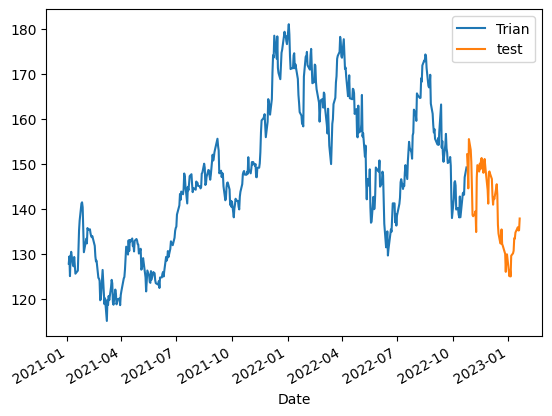

In [35]:
train['Adj Close'].plot(legend = True, label='Trian')
test['Adj Close'].plot(legend = True, label='test')
plt.show()



In [30]:
aapl

,Adj Close,MA30
Date,,
2021-01-04,127.874954,132.355746
2021-01-05,129.455948,132.355746
2021-01-06,125.098282,132.355746
2021-01-07,129.367035,132.355746
2021-01-08,130.483627,132.355746
...,...,...
2023-01-13,134.759995,135.467333
2023-01-17,135.940002,135.055000
2023-01-18,135.210007,134.635000


In [31]:
# Let's add some forecast benchmarks
test['naive forecast'] = test['Adj Close'].shift(1)
test['mean forecast'] = test['Adj Close'].mean()
test.head()

,Adj Close,MA30,naive forecast,mean forecast
Date,,,,
2022-10-25,152.087708,146.482004,NaN,140.410316
2022-10-26,149.102661,146.283666,152.087708,140.410316
2022-10-27,144.560196,146.031752,149.102661,140.410316
2022-10-28,155.482086,146.199474,144.560196,140.410316
2022-10-31,153.086044,146.161537,155.482086,140.410316


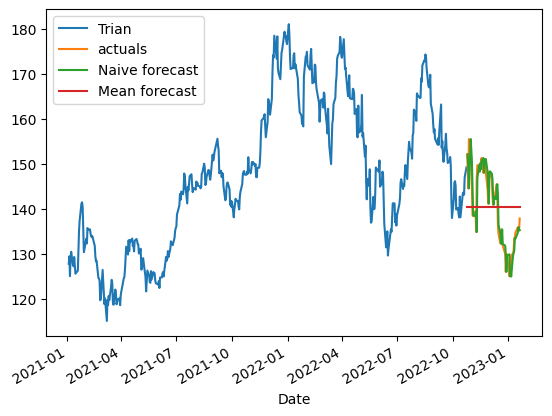

In [36]:
train['Adj Close'].plot(legend = True, label='Trian')
test['Adj Close'].plot(legend = True, label='actuals')
test['naive forecast'].plot(legend = True, label='Naive forecast')
test['mean forecast'].plot(legend = True, label='Mean forecast')

plt.show()
